# Modeling and Simulation in Python

HIV Model

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [2]:
init = State(R = 200, L = 0, E = 0, V = 100)

,values
R,200
L,0
E,0
V,100


In [3]:
system = System(gamma = 1.36, 
                tau = 0.2, 
                mu = 0.00136, 
                beta = 0.00027, 
                p = 0.1, 
                q = (1 - 0.1),
                alpha = 0.036,
                delta = 0.33,
                pi = 100,
                sigma = 2,
                dt = 1/24,
                time_steps = 300)

,values
gamma,1.360000
tau,0.200000
mu,0.001360
beta,0.000270
p,0.100000
q,0.900000
alpha,0.036000
delta,0.330000
pi,100.000000
sigma,2.000000


In [4]:
def update_func(state, system):
    
    """Runs through one timestep of the model
    
    state: current state of the model
    system: all model parameters
    
    returns: new state
    """
    
    new_state = state
    
    dR = (system.gamma*system.tau + system.mu*state.R - system.beta*state.V*state.R) * system.dt
    dL = (system.p*system.beta*state.V*state.R - system.mu*state.L - system.alpha*state.L) * system.dt
    dE = (system.q*system.beta*state.V*state.R + system.alpha*state.L - system.delta*state.E) * system.dt
    dV = (system.pi*state.E - system.sigma*state.V) * system.dt
    
    new_state.R += dR
    new_state.L += dL
    new_state.E += dE
    new_state.V += dV
    
    return new_state

In [5]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    
    frame = TimeFrame(columns=init.index)
    frame.row[0] = init
    
    for t in linrange(0, system.time_steps):
        frame.row[t+1] = update_func(frame.row[t], system)
    
    return frame

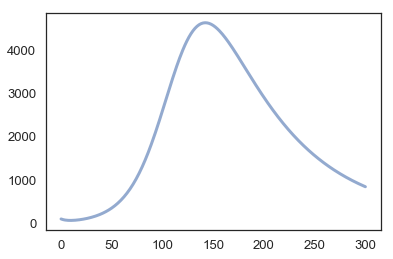

In [6]:
results = run_simulation(system, update_func)
plot(results.V)

In [7]:
def plot_v(v):
    plot(v)
    decorate(xlabel = 'Time (hours)',
             ylabel = 'Free Virions',
             title = 'Free Virions vs Time')

In [9]:
def plot_other(r, l, e):
    plot(r, label='R')
    plot(l, label='L')
    plot(e, label='E')
    decorate(xlabel = 'Time (hours)',
             ylabel = 'Cells',
             title = 'Cell Count vs Time')
    

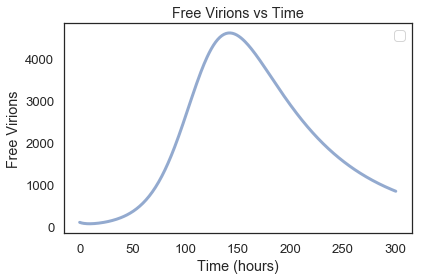

In [10]:
plot_v(results.V)

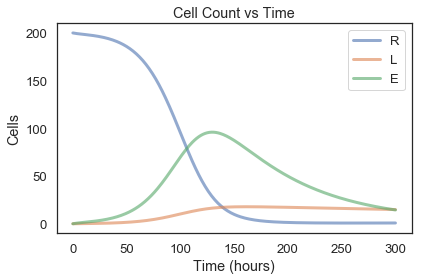

In [11]:
plot_other(results.R, results.L, results.E)